In [1]:
import sys
sys.path.append("/usr/local/lib/python3.7/site-packages")

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [14]:
# pltで画像見る用
def BGR2RGB(img):
    img[:,:,0], img[:,:,2] = img[:,:,2], img[:,:,0].copy()
    return img

# Q.21 ヒストグラム正規化

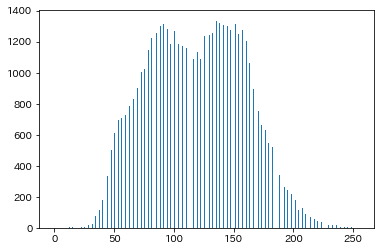

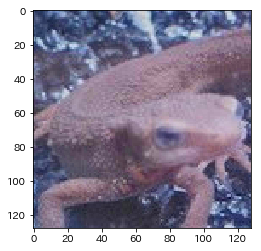

In [56]:
def hist_norm(img, a=0, b=255):
    c = img.min()
    d = img.max()
    
    output = img.copy()
    
    output = (b-a) / (d-c) * (output - c) + a
    output[img < a] = a
    output[img > b] = b
    
    output = output.astype(np.uint8)
    
    return output

img = cv2.imread("imori_dark.jpg").astype(np.float)
img = hist_norm(img)
cv2.imwrite("answers/answer21_1.jpg", img)

plt.hist(img.ravel(), bins=255, rwidth=0.8, range=(0, 255))
plt.savefig("answers/answer21_2.jpg")
plt.show()

plt.figure()
plt.imshow(BGR2RGB(img))

# Q.22 ヒストグラム操作

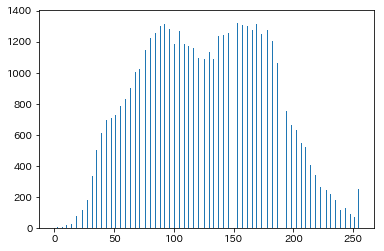

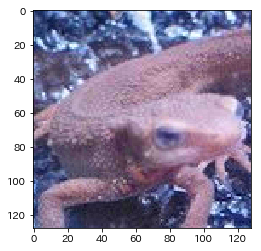

In [55]:
def hist_mani(img, m0=128, s0=52):
    m = np.mean(img)
    s = np.std(img)
    
    output = img.copy()
    
    output = s0 / s * (img - m) + m0
    output = np.clip(output, 0, 255)
    output = output.astype(np.uint8)
    
    return output

img = cv2.imread("imori_dark.jpg").astype(np.float)
img = hist_mani(img)
cv2.imwrite("answers/answer22_1.jpg", img)

plt.hist(img.ravel(), bins=255, rwidth=0.8, range=(0, 255))
plt.savefig("answers/answer22_2.jpg")
plt.show()

plt.figure()
plt.imshow(BGR2RGB(img))

# Q.23 ヒストグラム平坦化

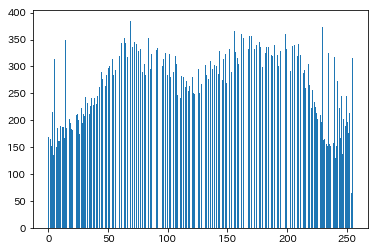

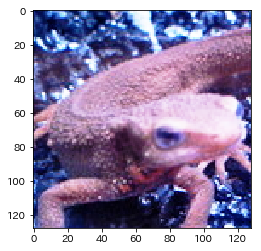

In [54]:
def hist_heitan(img, z_max=255):
    H, W, C = img.shape
    S = H * W * C
    
    output = img.copy()
    
    sum_h = 0
    for i in range(1, 255):
        sum_h += len(img[np.where(img == i)])
        z_ = z_max / S * sum_h
        output[np.where(img == i)] = z_
        
    output = output.astype(np.uint8)
    
    return output

img = cv2.imread("imori.jpg").astype(np.float)
img = hist_heitan(img)
cv2.imwrite("answers/answer23_1.jpg", img)

plt.hist(img.ravel(), bins=255, rwidth=0.8, range=(0, 255))
plt.savefig("answers/answer23_2.jpg")
plt.show()

plt.figure()
plt.imshow(BGR2RGB(img))

# Q.24 ガンマ補正

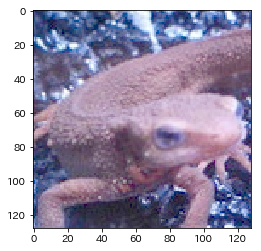

In [53]:
def gamma_correct(img, c=1, g=2.2):
    output = img.copy()
    
    output /= 255
    output = (1 / c * output) ** (1 / g)
    output *= 255
    output = output.astype(np.uint8)
    
    return output

img = cv2.imread("imori_gamma.jpg").astype(np.float)
img = gamma_correct(img)
cv2.imwrite("answers/answer24.jpg", img)

plt.figure()
plt.imshow(BGR2RGB(img))

# Q.25最近傍補間

(192, 192, 3)


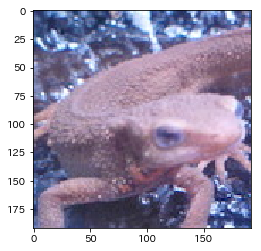

In [46]:
def nearest_neighbor(img, a=1.5):
    H, W, C = img.shape
    
    output = np.zeros((int(H*a), int(W*a), C), dtype=np.float)
    
    for y in range(int(H*a)):
        for x in range(int(W*a)):
            output[y, x] = img[int(np.round(y/a)), int(np.round(x/a))]
            
    output = output.astype(np.uint8)
    
    return output

img = cv2.imread("imori.jpg").astype(np.float)
img = nearest_neighbor(img)

print(img.shape)

cv2.imwrite("answers/answer25.jpg", img)

plt.figure()
plt.imshow(BGR2RGB(img))

# Q.26 Bi-linear補間

(192, 192, 3)


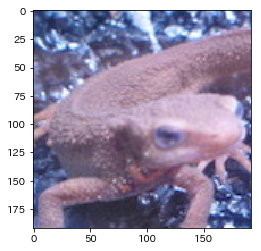

In [44]:
def BiLinear(img, ax=1., ay=1.):
    H, W, C = img.shape
    
    #変換後のサイズ
    aH = int(ay * H)
    aW = int(ax * W)
    
    y = np.arange(aH).repeat(aW).reshape(aH, -1)
    x = np.tile(np.arange(aW), (aH, 1))
    
    # 変換前の位置
    y = (y / ay)
    x = (x / ax)

    ix = np.floor(x).astype(np.int)
    iy = np.floor(y).astype(np.int)

    ix = np.minimum(ix, W-2)
    iy = np.minimum(iy, H-2)

    # 距離を求める
    dx = x - ix
    dy = y - iy
    
    dx = np.repeat(dx, 3).reshape(aH, aW, 3)
    dy = np.repeat(dy, 3).reshape(aH, aW, 3)
    
    # 補間する
    out = (1-dx) * (1-dy) * img[iy, ix] + dx * (1 - dy) * img[iy, ix+1] + (1 - dx) * dy * img[iy+1, ix] + dx * dy * img[iy+1, ix+1]

    out = np.clip(out, 0, 255)
    out = out.astype(np.uint8)

    return out


img = cv2.imread("imori.jpg").astype(np.float)

out = BiLinear(img, ax=1.5, ay=1.5)

print(out.shape)
cv2.imwrite("answers/answer26.jpg", img)

plt.figure()
plt.imshow(BGR2RGB(out))

# Q.27 Bi-cubic補間

(192, 192, 3)


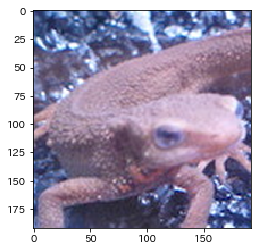

In [76]:
def BiCubic(img, ax=1., ay=1.):
    H, W, C = img.shape
    
    #変換後のサイズ
    aH = int(ay * H)
    aW = int(ax * W)
    
    y = np.arange(aH).repeat(aW).reshape(aH, -1)
    x = np.tile(np.arange(aW), (aH, 1))
    
    # 変換前の位置
    y = (y / ay)
    x = (x / ax)

    ix = np.floor(x).astype(np.int)
    iy = np.floor(y).astype(np.int)

    ix = np.minimum(ix, W-1)
    iy = np.minimum(iy, H-1)
    
    #距離を求める
    dx2 = x - ix
    dy2 = y - iy
    dx1 = dx2 + 1
    dy1 = dy2 + 1
    dx3 = 1 - dx2
    dy3 = 1 - dy2
    dx4 = 1 + dx3
    dy4 = 1 + dy3

    dxs = [dx1, dx2, dx3, dx4]
    dys = [dy1, dy2, dy3, dy4]
    
    def h(t):
        a = -1
        t = np.abs(t)
        w = np.zeros_like(t)
        index = np.where(t <= 1)
        w[index] = ((a+2) * np.power(t, 3) - (a+3) * np.power(t, 2) + 1)[index]
        index = np.where((t > 1) & (t <= 2))
        w[index] = (a*np.power(t, 3) - 5*a*np.power(t, 2) + 8*a*t - 4*a)[index]
        return w
        
    
    w_sum = np.zeros((aH, aW, C), dtype=np.float32)
    out = np.zeros((aH, aW, C), dtype=np.float32)
    
    for j in range(-1, 3):
        for i in range(-1, 3):
            x_index = np.minimum(np.maximum(ix+i, 0), W-1)
            y_index = np.minimum(np.maximum(iy+j, 0), H-1)
            
            wx = h(dxs[i+1])
            wy = h(dys[j+1])
            
            wx = np.repeat(wx, 3).reshape(aH, aW, 3)
            wy = np.repeat(wy, 3).reshape(aH, aW, 3)
            
            w_sum += wx * wy
            out += wx * wy * img[y_index, x_index]
    
    out /= w_sum
    out = np.clip(out, 0, 255)
    out = out.astype(np.uint8)
    
    return out

img = cv2.imread("imori.jpg").astype(np.float32)

out = BiCubic(img, ax=1.5, ay=1.5)

print(out.shape)
cv2.imwrite("answers/answer27.jpg", img)

plt.figure()
plt.imshow(BGR2RGB(out))

# Q.28 アフィン変換(平行移動)

(128, 128, 3)


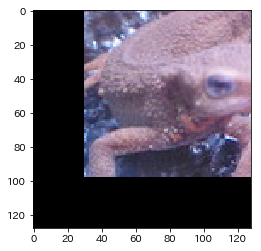

In [108]:
def affine(img, a=1, b=0, c=0, d=1, tx=0, ty=0):
    H, W, C = img.shape
    
    aH = int(d*H)
    aW = int(a*W)
    
    y = np.arange(aH).repeat(aW).reshape(aH, -1)
    x = np.tile(np.arange(aW), (aH, 1))
    
    ix = (d*x - b*y) / (a*d - b*c) - tx
    iy = (-c*x + a*y) / (a*d - b*c) - ty
    
    ix = np.round(ix).astype(np.int)
    iy = np.round(iy).astype(np.int)
    
    out = np.zeros((aH, aW, C), dtype=np.float32)
    
    for j in range(aH):
        for i in range(aW):
            if (0 <= iy[j, i] and iy[j ,i] < W) and (0 <= ix[j, i] and ix[j, i] < H):
                out[j, i] = img[iy[j, i], ix[j, i]]
                
    out = out.astype(np.uint8)
    
    return out

img = cv2.imread("imori.jpg").astype(np.float)

out = affine(img, tx=30, ty=-30)

print(out.shape)
cv2.imwrite("answers/answer28.jpg", img)

plt.figure()
plt.imshow(BGR2RGB(out))

# Q.29 アフィン変換(拡大縮小)

(102, 166, 3)
(102, 166, 3)


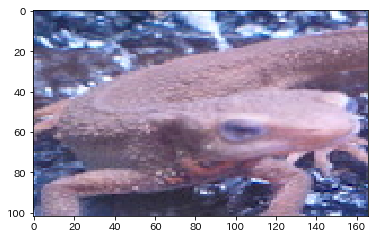

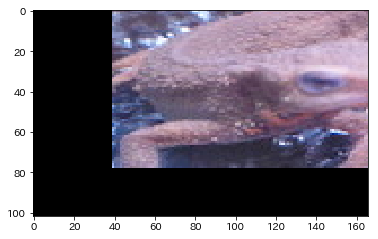

In [109]:
img = cv2.imread("imori.jpg").astype(np.float)

out1 = affine(img, a=1.3, d=0.8)

print(out1.shape)
cv2.imwrite("answers/answer29_1.jpg", out1)

out2 = affine(img, a=1.3, d=0.8, tx=30, ty=-30)
print(out2.shape)
cv2.imwrite("answers/answer29_2.jpg", out2)

plt.figure()
plt.imshow(BGR2RGB(out1))

plt.figure()
plt.imshow(BGR2RGB(out2))

# Q.30 アフィン変換(回転)

(128, 128, 3)
(128, 128, 3)


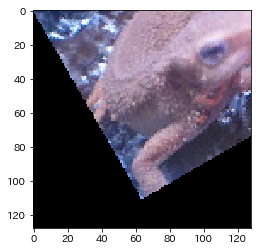

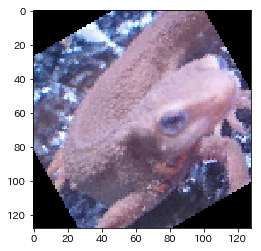

In [111]:
def affine1(img, a=1, b=0, c=0, d=1, tx=0, ty=0):
    H, W, C = img.shape
    
    aH = H
    aW = W
    
    y = np.arange(aH).repeat(aW).reshape(aH, -1)
    x = np.tile(np.arange(aW), (aH, 1))
    
    ix = (d*x - b*y) / (a*d - b*c) - tx
    iy = (-c*x + a*y) / (a*d - b*c) - ty
    
    ix = np.round(ix).astype(np.int)
    iy = np.round(iy).astype(np.int)
    
    out = np.zeros((aH, aW, C), dtype=np.float32)
    
    for j in range(aH):
        for i in range(aW):
            if (0 <= iy[j, i] and iy[j ,i] < W) and (0 <= ix[j, i] and ix[j, i] < H):
                out[j, i] = img[iy[j, i], ix[j, i]]
                
    out = out.astype(np.uint8)
    
    return out

#中心回転
def affine2(img, a=1, b=0, c=0, d=1, tx=0, ty=0):
    H, W, C = img.shape
    
    aH = H
    aW = W
    
    centerX = aW // 2
    centerY = aH // 2
    
    y = np.arange(aH).repeat(aW).reshape(aH, -1)
    x = np.tile(np.arange(aW), (aH, 1))
    
    ix = (d*(x - centerX) - b*(y - centerY)) / (a*d - b*c) - tx + centerX
    iy = (-c*(x - centerX) + a*(y - centerY)) / (a*d - b*c) - ty + centerY
    
    ix = np.round(ix).astype(np.int)
    iy = np.round(iy).astype(np.int)
    
    out = np.zeros((aH, aW, C), dtype=np.float32)
    
    for j in range(aH):
        for i in range(aW):
            if (0 <= iy[j, i] and iy[j ,i] < W) and (0 <= ix[j, i] and ix[j, i] < H):
                out[j, i] = img[iy[j, i], ix[j, i]]
                
    out = out.astype(np.uint8)
    
    return out

img = cv2.imread("imori.jpg").astype(np.float)

A = 30.
theta = - np.pi * A / 180.

out1 = affine1(img, a=np.cos(theta), b=-np.sin(theta), c=np.sin(theta), d=np.cos(theta))
print(out1.shape)
cv2.imwrite("answers/answer30_1.jpg", out1)

out2 = affine2(img, a=np.cos(theta), b=-np.sin(theta), c=np.sin(theta), d=np.cos(theta))
print(out2.shape)
cv2.imwrite("answers/answer30_2.jpg", out2)

plt.figure()
plt.imshow(BGR2RGB(out1))
plt.figure()
plt.imshow(BGR2RGB(out2))